In [1]:
import os, shutil

In [2]:

cwd = os.getcwd()
cwd

'/Users/shashank/Desktop/Deep Learning April 2018/Deep_learning_with_Python'

In [15]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/Users/shashank/Desktop/Deep Learning April 2018/Deep_learning_with_Python/kaggle_original_data'

# The directory where we will
# store our smaller dataset
base_dir = '/Users/shashank/Desktop/Deep Learning April 2018/Deep_learning_with_Python/cats_and_dogs_small'

# The path to the directory where the original
# dataset was uncompressed
#original_dataset_dir = '/Users/shashank/Downloads/SpringboardDatascience/_1Deeplearning/Deep_learning_with_Python/Chapter5_assignment/kaggle_original_data'

# The directory where we will
# store our smaller dataset
#base_dir = '/Users/shashank/Downloads/SpringboardDatascience/_1Deeplearning/Deep_learning_with_Python/Chapter5_assignment/cats_and_dogs_small'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [16]:
print('total training cat images:',len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [17]:
print('total training dog images:',len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [18]:
print('total validation dog images:',len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [19]:
print('total validation cat images:',len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [20]:
print('total test dog images:',len(os.listdir(test_dogs_dir)))

total test dog images: 500


In [21]:
print('total test cat images:',len(os.listdir(test_cats_dir)))

total test cat images: 500


There are 2000 training images, 1000 validation images, 1000 test images. 

## Build network

In [22]:
from keras import models, layers

Using TensorFlow backend.


In [23]:
 model= models.Sequential()

In [24]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2),strides=None, padding='valid'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2),strides=None, padding='valid'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2),strides=None, padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
          


In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
__________

In [37]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

## Data Proprocessing

The data should be in appropriate preprocessed floating point tensors before being fed into network. Currently the data sits in the drive as JPEG and steps for getting into network is as follows
1. Read the picture files
2. Decode JPEG content to RGB grids
3. convert these into floating point tensors
4. Rescale the pixels to [0,1].

In [ ]:
### ImageDataGenerator to read images from directory

In [27]:
train_dir

'/Users/shashank/Desktop/Deep Learning April 2018/Deep_learning_with_Python/cats_and_dogs_small/train'

In [28]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Fit the model using generator

In [38]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 222s - loss: 2.6320 - acc: 0.5210 - val_loss: 0.6747 - val_acc: 0.5760
Epoch 2/30
100/100 [==============================] - 240s - loss: 0.6694 - acc: 0.6215 - val_loss: 0.5835 - val_acc: 0.7000
Epoch 3/30
100/100 [==============================] - 193s - loss: 0.5963 - acc: 0.6940 - val_loss: 0.6001 - val_acc: 0.6730
Epoch 4/30
100/100 [==============================] - 198s - loss: 0.5290 - acc: 0.7480 - val_loss: 0.5643 - val_acc: 0.7070
Epoch 5/30
100/100 [==============================] - 197s - loss: 0.4517 - acc: 0.7915 - val_loss: 0.5970 - val_acc: 0.6880
Epoch 6/30
100/100 [==============================] - 197s - loss: 0.3573 - acc: 0.8390 - val_loss: 0.8258 - val_acc: 0.6800
Epoch 7/30
100/100 [==============================] - 199s - loss: 0.2796 - acc: 0.8820 - val_loss: 1.2233 - val_acc: 0.6460
Epoch 8/30
100/100 [==============================] - 196s - loss: 0.1937 - acc: 0.9230 - val_loss: 0.9247 - val_acc: 0.7150


In [39]:
model.save("cats_and_dogs_small.h5")

## Loss and accuracy during training

In [33]:
import matplotlib.pyplot as plt

In [42]:
acc= history.history['acc']
val_acc= history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']

In [43]:
epochs= range(1,len(acc)+1)

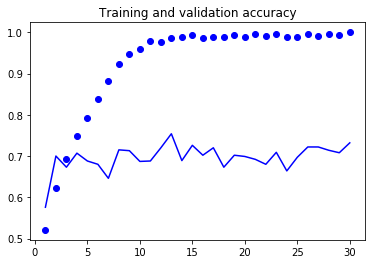

In [47]:
plt.plot(epochs,acc,'bo')
plt.plot(epochs,val_acc,'b')
plt.title("Training and validation accuracy")

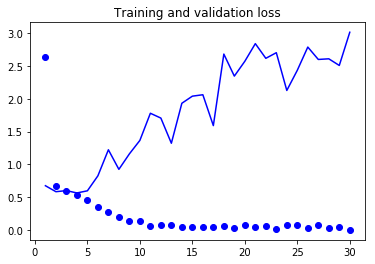

In [48]:
plt.plot(epochs,loss,'bo')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation loss")

Overfitting – Validation error is high, training error low

Good fit – Validation error low, slightly higher than the training error

## Reduce overfitting using following methods: 
1. More Data
2. L2 regularization
3. Drop out
4. Data augmentation

### Setting up Data augementation technique using Image Data Generator

In [49]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

Using Dropout in conjection with Data augmentation to completely remove overfitting

In [50]:
model= models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2),strides=None, padding='valid'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2),strides=None, padding='valid'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2),strides=None, padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [51]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [52]:
# Train the new model

In [53]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [54]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 214s - loss: 0.7445 - acc: 0.5245 - val_loss: 0.6456 - val_acc: 0.6200
Epoch 2/30
100/100 [==============================] - 201s - loss: 0.6838 - acc: 0.5875 - val_loss: 0.6316 - val_acc: 0.6100
Epoch 3/30
100/100 [==============================] - 205s - loss: 0.6567 - acc: 0.6205 - val_loss: 0.6062 - val_acc: 0.6580
Epoch 4/30
100/100 [==============================] - 216s - loss: 0.6302 - acc: 0.6530 - val_loss: 0.5835 - val_acc: 0.6850
Epoch 5/30
100/100 [==============================] - 258s - loss: 0.6385 - acc: 0.6535 - val_loss: 0.5885 - val_acc: 0.6820
Epoch 6/30
100/100 [==============================] - 238s - loss: 0.6169 - acc: 0.6585 - val_loss: 0.6014 - val_acc: 0.6770
Epoch 7/30
100/100 [==============================] - 252s - loss: 0.6038 - acc: 0.6695 - val_loss: 0.5843 - val_acc: 0.7050
Epoch 8/30
100/100 [==============================] - 271s - loss: 0.6116 - acc: 0.6825 - val_loss: 0.5657 - val_acc: 0.7050


In [55]:
acc= history.history['acc']
val_acc= history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']

In [56]:
epochs= range(1,len(acc)+1)

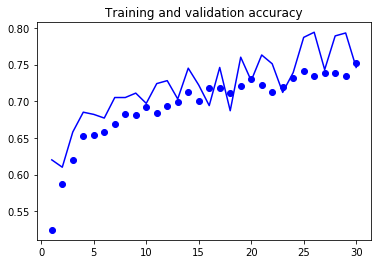

In [57]:
plt.plot(epochs,acc,'bo')
plt.plot(epochs,val_acc,'b')
plt.title("Training and validation accuracy")

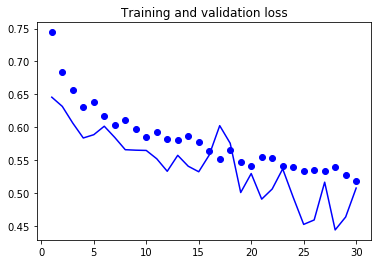

In [58]:
plt.plot(epochs,loss,'bo')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation loss")

Thanks to data augmentation and dropout, we are no longer overfitting: the training curves are rather closely tracking the validation curves. We are now able to reach an accuracy of 82%, a 15% relative improvement over the non-regularized model.